# Best Reciprocal Sqrt ?

**Seemingly minor variations** in the way we approach computing **Reciprocal Sqrt** can perform as much as **3 to 4 orders of magnitude**faster or slower. 

Which one you choose depends on your need for **accuracy, speed, reability, maintainability**.

### See which one scores highest in your needs assetsment!

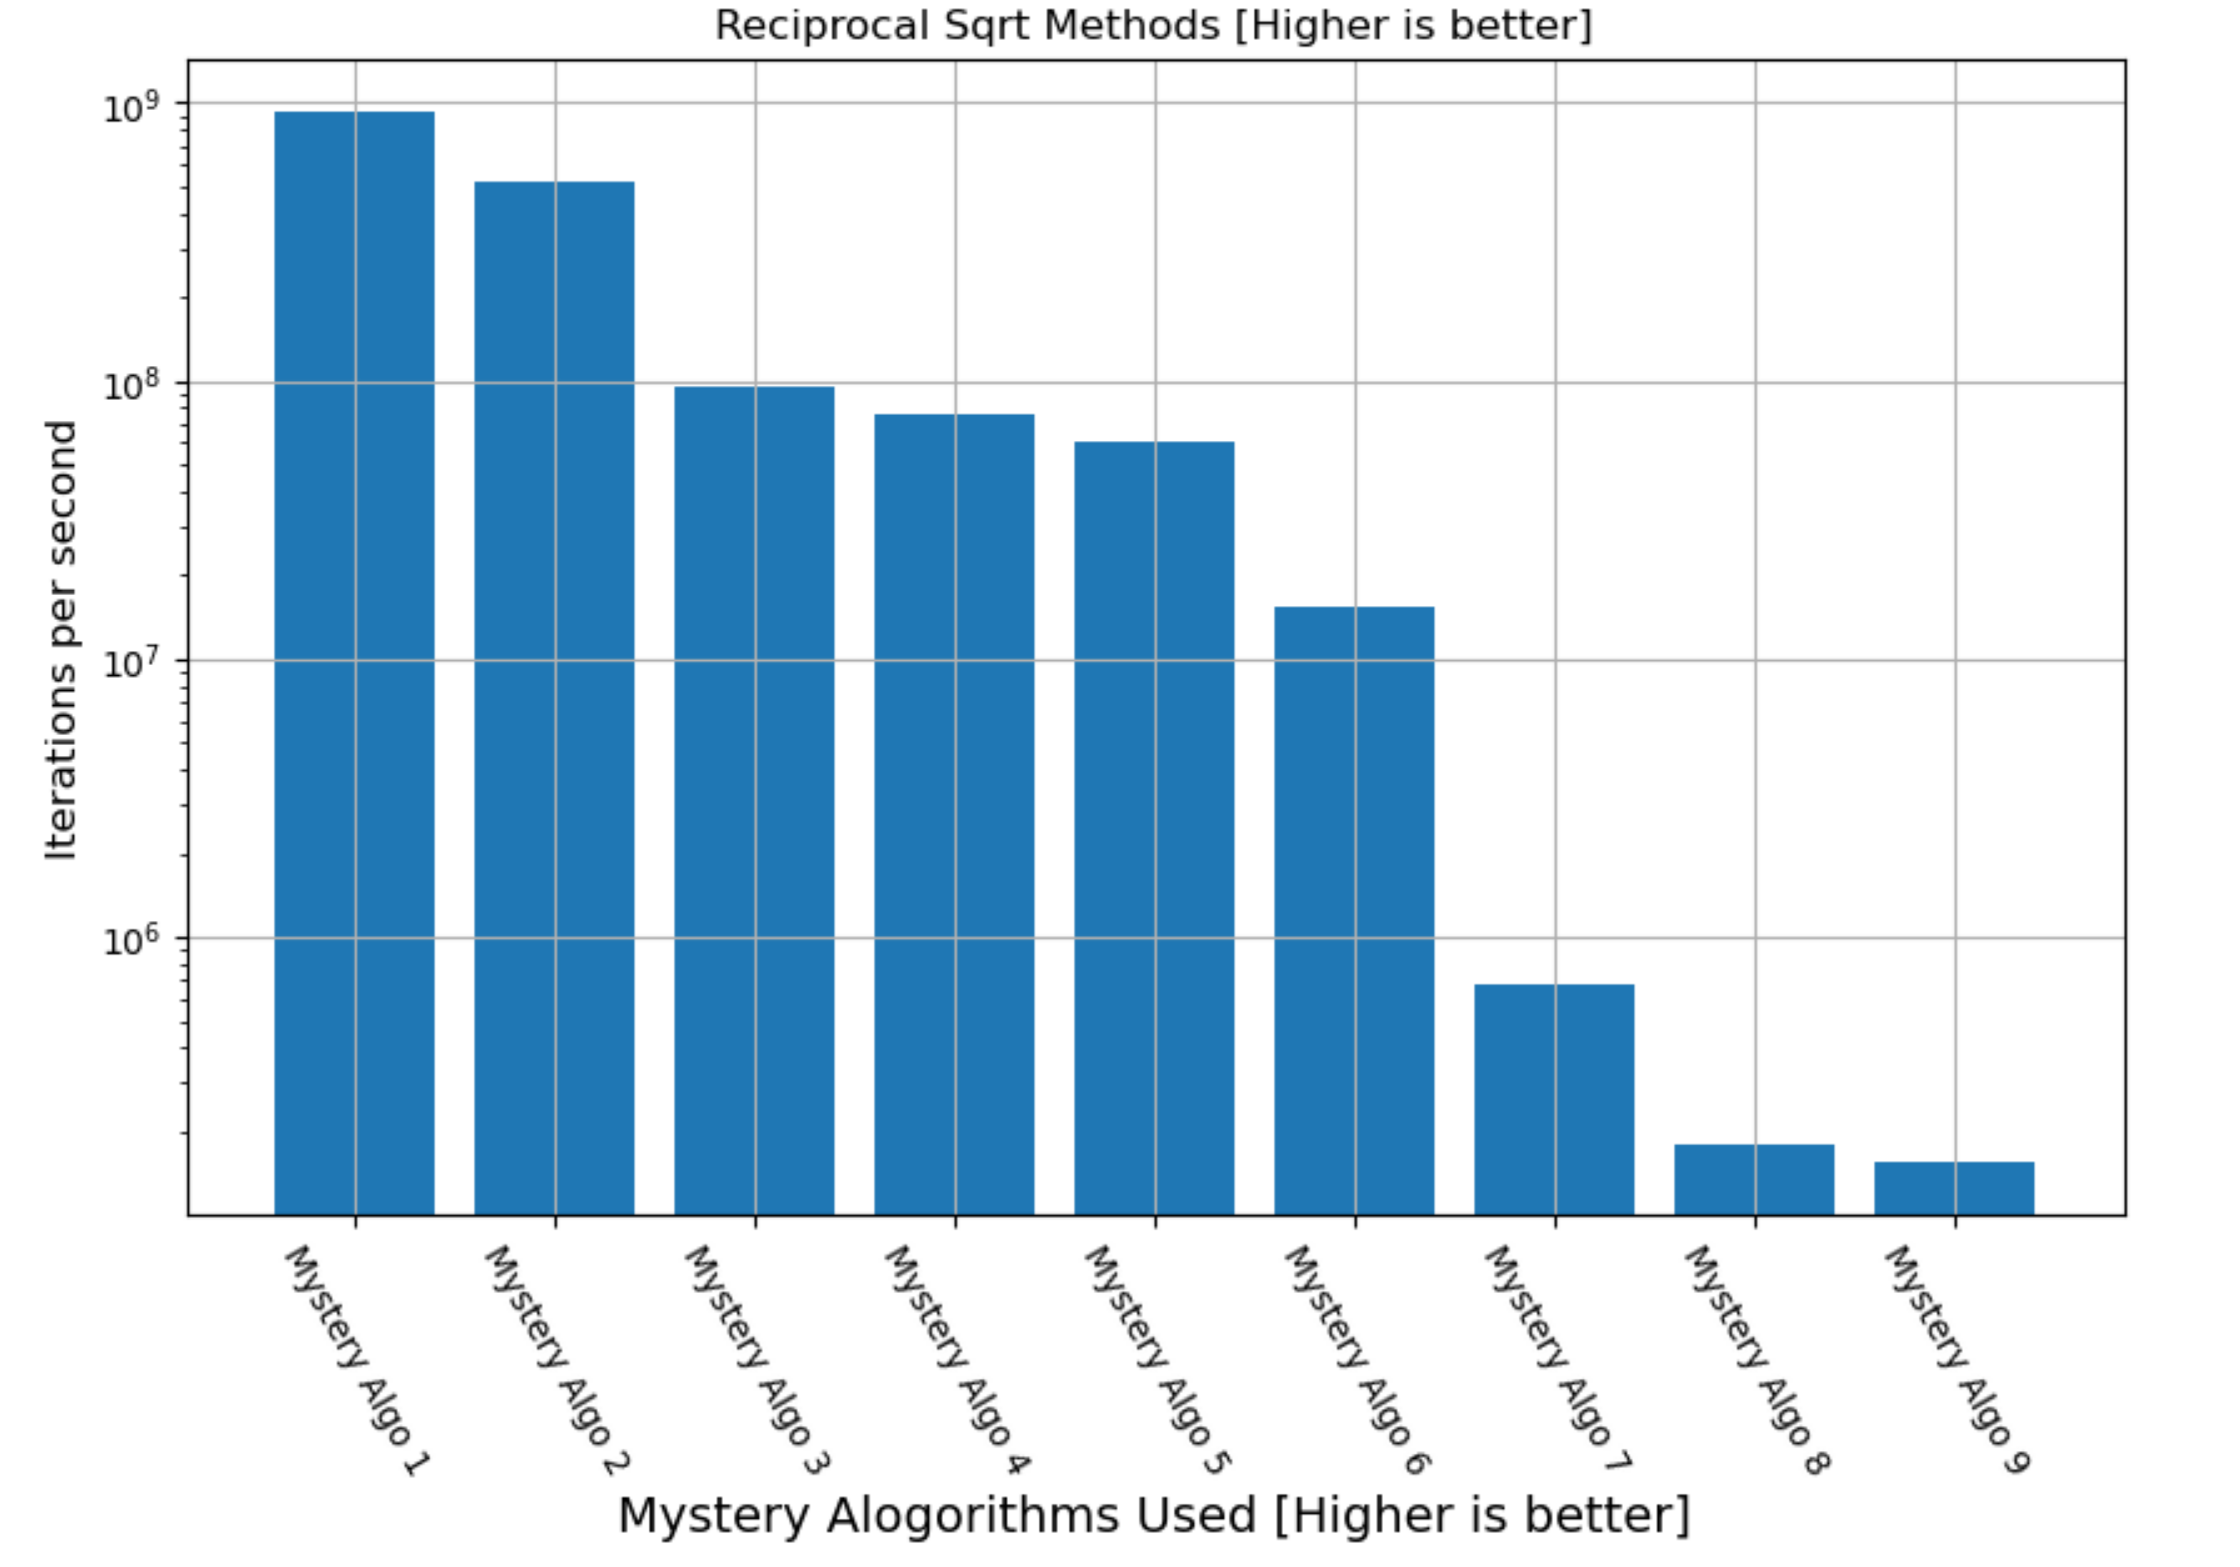

## Where is it used?
- ### Physics/ Engineering
    - ### Special Relativity Lorentz transformation
    - ## ${\displaystyle \gamma ={\frac {1}{\sqrt {1-{\frac {v^{2}}{c^{2}}}}}}}$
- ### 3D Graphics or ML applications needing normailization in space
    - #### vector normalization in video games and is mostly used in calculations involved in 3D programming
 
This is an intersting topic as the recent history of this computation shows a seesaw improvement in methods used

- Still find articles extolling virtue of Fast Reciprocal Sqrt as was implemeted in Quake III - Just an ingenious applicatiopn of Newton method to get fast approximations of this value
- Then the introduction by Intel of SSE instructions which compute reciprocal sqrt as part of SSE instruction set
- Where does it stand today?
- See article [Is Fast Inverse Square Root still Fast?](https://www.linkedin.com/pulse/fast-inverse-square-root-still-armin-kassemi-langroodi/?utm_source=share&utm_medium=member_android&utm_campaign=share_via)
- See article by ajcr
    - https://ajcr.net/fast-inverse-square-root-python/




## What we we test in this notebook?

In this workbook we will test the folloing approaches:

- PyTorch rsqrt:
    - Use torch built in function rsqrt()
- NumP_Compose RecipSqrt
    - Use NumPy np.reicprocal(np.sqrt())
- NumPy_Simple
    - Use Numpy implicit vectors: b = a**-.5
- Cython_Simple
    - Use Cython variant of Simple a**-.5
- Numba_Simple
    - Use Numba njit varaint of Simple a**-.5
- Brute Force List Comprehension element by element
    - Brute force loop approach no vectorization at all
- FRSNewton-RaphsonLoop
    - Fast Reciprocal Sqrt using Newton Raphson and Quake III approach
- FRSNewton-RaphsonVectorize
    - Fast Reciprocal Sqrt using Newton Raphson and Quake III approach vecortized with np.apply
- FRSNewton-RaphsonSNewtonCython
    - Fast Reciprocal Sqrt using Newton Raphson and Quake III approach in Cython

In [1]:
# Text color values
rd = '\033[91m'
gr = '\033[92m'
yl = '\033[93m'
bl = '\033[94m'
pk = '\033[95m'
tl = '\033[96m'
gy = '\033[97m'
bk = '\033[0m'

import time
import math
N =  1_000_000
a = [i for i in range(1, N)]
b = []
timing = {}

In [2]:
t1 = time.time()
b = [1.0/math.sqrt(x) for x in a]
t2 = time.time()
timing[f'BruteForceLoopExact'] = N/(t2-t1)
print(f"elapsed {rd}{N/(t2-t1):,.1f} iter/sec{bk}")
b[:5]  # aproximate answer

elapsed 8,096,002.3 iter/sec


[1.0, 0.7071067811865475, 0.5773502691896258, 0.5, 0.4472135954999579]

# Cython Newton Approximation Method

https://cython.readthedocs.io/en/latest/src/tutorial/cython_tutorial.html

In [3]:
import numpy as np
a = np.array([i for i in range(1, N)])
a = np.expand_dims(a, axis = 0)  # make the array the right sahpe for use by apply


### Time compute for single value

As Cython can accept almost any valid python source file, one of the hardest things in getting started is just figuring out how to compile your extension.

```python
def ctypes_nbsqrt(number):  # operates on single value at a time
    from ctypes import c_float, c_int32, cast, byref, POINTER
    threehalfs = 1.5
    x2 = number * 0.5
    y = c_float(number)

    i = cast(byref(y), POINTER(c_int32)).contents.value
    i = c_int32(0x5f3759df - (i >> 1))
    y = cast(byref(i), POINTER(c_float)).contents.value

    y = y * (1.5 - (x2 * y * y))
    return y
```
Save this code in a file named **cython_NewtonRecipSqrt.pyx**. Now we need to create the setup.py, which is like a python Makefile (for more information see Source Files and Compilation). Your **setup.py** should look like:

```python
from setuptools import setup
from Cython.Build import cythonize

setup(
    ext_modules = cythonize("helloworld.pyx")
)
```

To use this to build your Cython file use the commandline options:

```bash
$ python setup.py build_ext --inplace
```

Which will leave a file in your local directory called helloworld.so in unix or helloworld.pyd in Windows. Now to use this file: start the python interpreter and simply import it as if it was a regular python module:

In [4]:
!python setup.py build_ext --inplace 

### The shared object is now available

from the shared object, import the function

In [5]:
from cython_NewtonRecipSqrt import ctypes_nbsqrt
t1 = time.time()
print("estimate 1/sqrt(16)", ctypes_nbsqrt(16) ) # FOr a single value
t2 = time.time()
print(f"elapsed single calc {(t2-t1):,.1f} sec")


estimate 1/sqrt(16) 0.24957678739619552
elapsed single calc 0.0 sec


In [6]:
t1 = time.time()
b = np.apply_along_axis(ctypes_nbsqrt, 0, a)
t2 = time.time()
timing['FRSNewtonCython'] = N/(t2-t1)
print(f"elapsed {rd}{N/(t2-t1):,.1f} iter/sec{bk}")
b[:5]  # aproximate answer

elapsed 100,100.4 iter/sec


array([[9.98307150e-01, 7.06930039e-01, 5.76846836e-01, ...,
        9.98306080e-04, 9.98305582e-04, 9.98305085e-04]])

In [7]:
# ctypes_isqrt(a)   #error

# Cython Simple  Method

- Edit & save:  **cython_Exact.pyx**
   
```python
def ctypes_Exsqrt(x):  # operates on single value at a time
    y = x**(-.5)
    return y
```

- edit & save **setup.py**
  ```python
    from distutils.core import setup
    from Cython.Build import cythonize
    setup(ext_modules = cythonize('cython_NewtonRecipSqrt.pyx'))
    setup(ext_modules = cythonize('cython_Exact.pyx'))
```

- python setup.py build_ext --inplace
- setup(ext_modules = cythonize('cython_Exact.pyx')) creates cython_Eact.so



- now we can import using in Jupyter:

```python
    from cython_Exact import ctypes_Exsqrt
```

In [8]:
from cython_Exact import ctypes_Exsqrt

In [9]:
t1 = time.time()
b = ctypes_Exsqrt(a)
t2 = time.time()
timing['CythonExact Simple'] = N/(t2-t1)
print(f"elapsed {gr}{N/(t2-t1):,.1f} iter/sec{bk}")
b[:5]  # aproximate answer

elapsed 35,627,375.2 iter/sec


array([[1.        , 0.70710678, 0.57735027, ..., 0.001     , 0.001     ,
        0.001     ]])

Speedup :  356 X


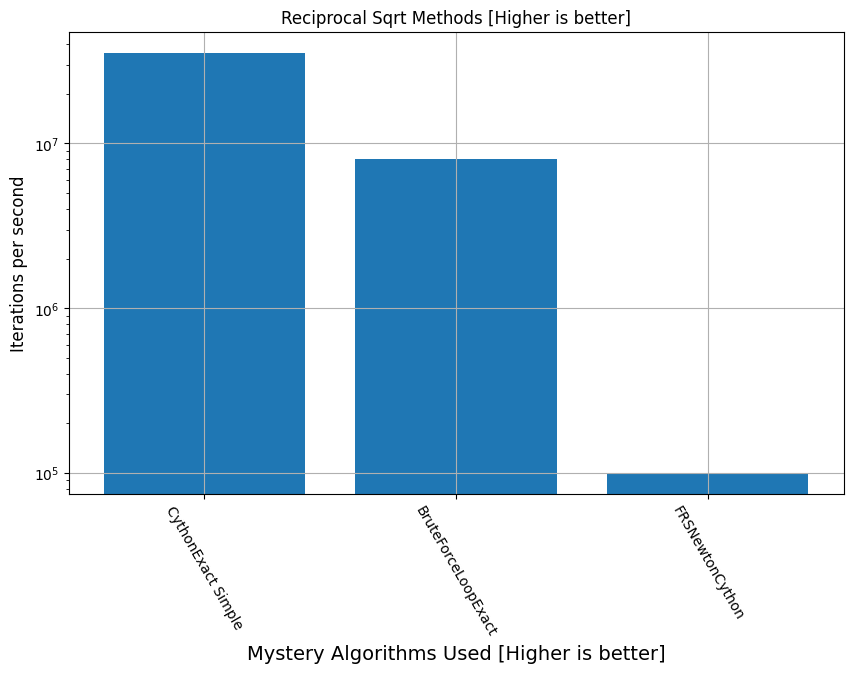

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Reciprocal Sqrt Methods [Higher is better]")
plt.ylabel("Iterations per second",fontsize=12)
plt.xlabel("Mystery Algorithms Used [Higher is better]",fontsize=14)
plt.grid(True)
plt.yscale('log')
plt.xticks(rotation=-60)
timingH = dict(sorted(timing.items(), key=lambda x:x[1], reverse=True))
plt.bar(x = range(len(timingH)), height=timingH.values(), align='center', tick_label=list(timingH.keys()))
mysteryList = [f'Mystery Algo {i+1}' for i in range(len(timingH))]
#plt.bar(x = range(len(timingH)), height=timingH.values(), align='center', tick_label=mysteryList)
short = min(list(timingH.values()))
long = max(list(timingH.values()))
print('Speedup : {:4.0f} X'.format(long/short))

# Incomplete Experiments

### Use Intel compiler to make shared onject (so)

On DevCLoud:
- After the python setup.py ..., then compile the generated .C file with intel compiler as follows:

```python
icx-cc -fPIC -shared -o bob_cython.so cython_Exact.c -I../../intel/oneapi/intelpython/python3.9/include/python3.9/

```

On your laptop:
- Download from here: https://www.intel.com/content/www/us/en/developer/articles/tool/oneapi-standalone-components.html#dpcpp-cpp


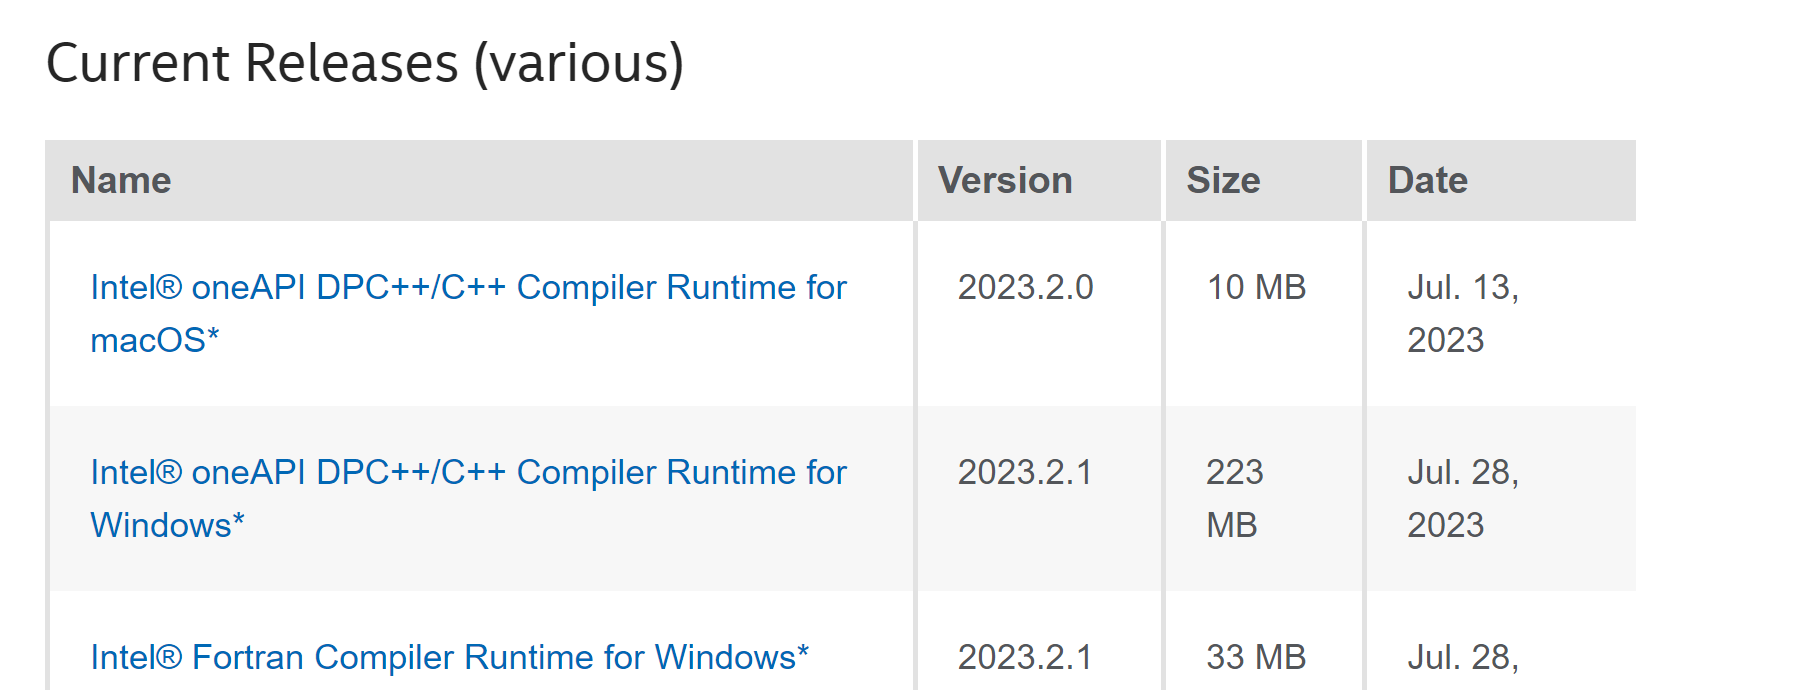


- Install on linux (WSL: Ubunutu)

```bash
sh Downloads/l_dpcpp-cpp-compiler_p_2023.2.1.8_offline.sh

source intel/oneapi/setvars.sh intel64 --force

cd Examples/python/

icx-cc -fPIC -shared -o bob_cython.so cython_Exact.c -I../../intel/oneapi/intelpython/python3.9/include/python3.9/

```

DID NOT GET THE COMPILER PART TO WORK YET


In [11]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          24
On-line CPU(s) list:             0-23
Thread(s) per core:              2
Core(s) per socket:              6
Socket(s):                       2
NUMA node(s):                    2
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           85
Model name:                      Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz
Stepping:                        4
CPU MHz:                         1200.406
CPU max MHz:                     3700.0000
CPU min MHz:                     1200.0000
BogoMIPS:                        6800.00
Virtualization:                  VT-x
L1d cache:                       384 KiB
L1i cache:                       384 KiB
L2 cache:                        12 MiB
L3 cache:                    

In [12]:
!free -g -h -t

              total        used        free      shared  buff/cache   available
Mem:          188Gi        17Gi       168Gi       2.0Mi       3.5Gi       169Gi
Swap:         1.9Gi       1.9Gi       5.0Mi
Total:        190Gi        18Gi       168Gi
